# Practica 3

#### Descripción de campos importantes: BIMBO
|Campo|Descripción|
|---|:---|
|State|Estado|
|Producto_ID|Identificación del Producto|
|NombreProducto|Producto|
|Cliente_ID|Identificación del producto|
|NombreCliente|Nombre|
|Semana|Constante en 3|
|Canal_ID|Identificación del canal de ventas|
|Ruta_SAK|Identificación de Ruta|
|Venta_uni_hoy|Unidades vendidas|
|Venta_hoy|Monto vendido|
|Dev_uni_proxima|Unidedades devueltas|
|Dev_proxima|Monto de las devoluciones|
|Demanda_uni_equil|Demanda Target|
 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from pandas import Series, DataFrame
from matplotlib import collections as collections
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [2]:
bimbo = pd.read_csv('Bimbo.csv',encoding='latin-1')
bimbo.head()

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,1605,2,17.96,0,0.0,2
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,2006,6,44.46,0,0.0,6
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,2024,4,17.76,0,0.0,4
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,1630,5,62.95,0,0.0,5
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,2057,3,13.32,0,0.0,3


#### Separamos el campo Town en codTown y Pueblo

In [3]:
bimbo["codTown"]=bimbo['Town'].str[0:4]
bimbo["Pueblo"]=bimbo['Town'].str[5:50]
bimbo.head()

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,codTown,Pueblo
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,1605,2,17.96,0,0.0,2,2001,AG. ATIZAPAN
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,2006,6,44.46,0,0.0,6,2260,GONZALEZ GALLO
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,2024,4,17.76,0,0.0,4,2365,PUEBLA SUR BIMBO
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,1630,5,62.95,0,0.0,5,2021,AG. XOCHIMILCO 2
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,2057,3,13.32,0,0.0,3,2278,ZAPOPAN BIMBO


***

### 1.	Quitar filas duplicadas

In [4]:
bimbo.duplicated().any()  

False

In [5]:
bimbo.drop_duplicates(subset=None, inplace=True)  

In [6]:
bimbo.columns

Index(['nro', 'Agencia_ID', 'Town', 'State', 'Producto_ID', 'NombreProducto',
       'Cliente_ID', 'NombreCliente', 'Semana', 'Canal_ID', 'Ruta_SAK',
       'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima', 'Dev_proxima',
       'Demanda_uni_equil', 'codTown', 'Pueblo'],
      dtype='object')

|Conclusión|
|:---|
|No existen duplicados en el dataset|
|Aplicando la función, el Dataset se mantiene inalterado|

***

### 2.	Quitar columnas duplicadas

In [7]:
bimboSinCR = bimbo.T.drop_duplicates().T
bimboSinCR.shape

(5000, 18)

|Conclusión|
|:---|
|No existen columnas repetidas|


***

### 3. Identificar columnas que tienen valores constantes

In [8]:
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result

In [9]:
bimboSinCK = drop_constant_columns(bimbo)
bimboSinCK.shape  


(5000, 17)

In [10]:
np.unique(bimbo["Semana"])

array([3], dtype=int64)

|Conclusión|
|:---|
|El Datset tien una columna "Semana" con valores constantes|


***

### 4.	Identifique el porcentaje de valores faltantes en las columnas


In [11]:
total = bimbo.isnull().sum().sort_values(ascending=False)
porcentaje = (bimbo.isnull().sum()/bimbo.isnull().count()).sort_values(ascending=False)
faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
faltantes  

,Total,Porcentaje
State,35,0.007
Pueblo,0,0.000
codTown,0,0.000
Agencia_ID,0,0.000
Town,0,0.000
Producto_ID,0,0.000
NombreProducto,0,0.000
Cliente_ID,0,0.000
NombreCliente,0,0.000
Semana,0,0.000


|Conclusión|
|:---|
|El Datset contiene 0,7% de datos faltantes en el campo State|


***

### 5.	Analice el caso de los atributos siguientes por medio de la obtención de gráficas: Agencia_ID, Town, Product_ID, Cliente_ID, NombreCliente, Semana, Canal_ID, Ruta_SAK, Venta_uni_hoy, Venta_hoy. Cuales decidiría usted de transformar o en su caso quitar, con el propósito de mejorar el dataset.

#### Histogramas

array([[<AxesSubplot:title={'center':'nro'}>,
        <AxesSubplot:title={'center':'Agencia_ID'}>,
        <AxesSubplot:title={'center':'Producto_ID'}>],
       [<AxesSubplot:title={'center':'Cliente_ID'}>,
        <AxesSubplot:title={'center':'Semana'}>,
        <AxesSubplot:title={'center':'Canal_ID'}>],
       [<AxesSubplot:title={'center':'Ruta_SAK'}>,
        <AxesSubplot:title={'center':'Venta_uni_hoy'}>,
        <AxesSubplot:title={'center':'Venta_hoy'}>],
       [<AxesSubplot:title={'center':'Dev_uni_proxima'}>,
        <AxesSubplot:title={'center':'Dev_proxima'}>,
        <AxesSubplot:title={'center':'Demanda_uni_equil'}>]], dtype=object)

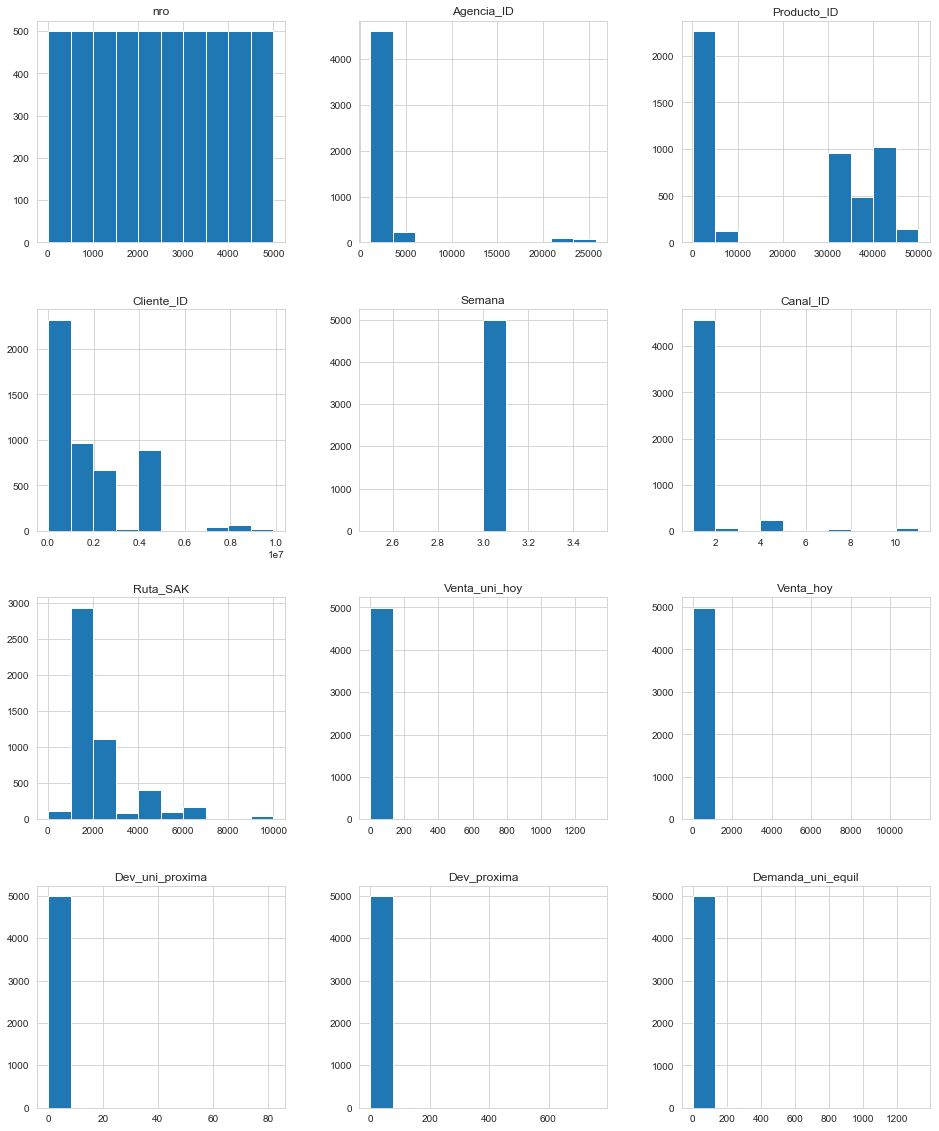

In [12]:
bimbo.hist(figsize=(16, 20))

|Variable|Análisis|Conclusión|
|:---|:---||
|Agencia_ID|Esta variable es un número de identificación (monotonocidad)|Eliminar la variable|
|Town|ID del pueblo|Eliminar la variable|
|Product_ID|Esta variable es un número de identificación (monotonocidad)|Eliminar la variable|
|Cliente_ID|Esta variable es un número de identificación (monotonocidad)|Eliminar la variable|
|NombreCliente|Esta variable es un número de identificación (monotonocidad)|Eliminar la variable|
|Semana|Presenta valores constantes (3)|Se debe eliminar la variable|
|Canal_ID||Se debe discretizar la variable|
|Ruta_SAK|Identificación de la Ruta|Eliminar la variable|
|Venta_uni_hoy||
|Venta_hoy|Losión||


***

#### ●	Scatter plots


<AxesSubplot:xlabel='Venta_hoy', ylabel='Venta_uni_hoy'>

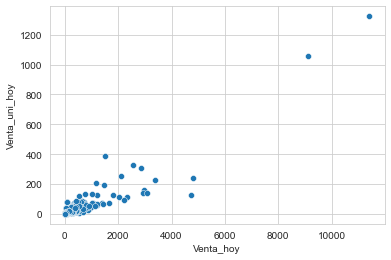

In [13]:
sb.scatterplot(data=bimbo, x="Venta_hoy", y="Venta_uni_hoy")

***

#### ● Distributions


<AxesSubplot:xlabel='Venta_hoy', ylabel='Density'>

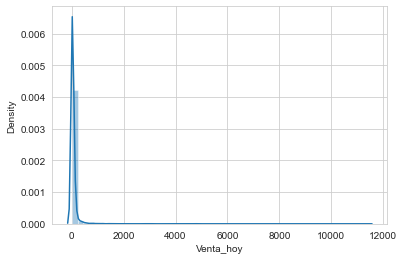

In [14]:
sb.distplot(bimbo['Venta_hoy'])

<AxesSubplot:xlabel='Venta_uni_hoy', ylabel='Density'>

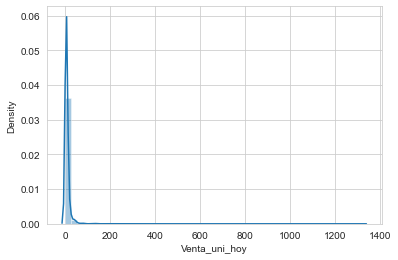

In [15]:
sb.distplot(bimbo['Venta_uni_hoy'])

***

#### ● Heatmaps

<AxesSubplot:xlabel='Venta_uni_hoy', ylabel='State'>

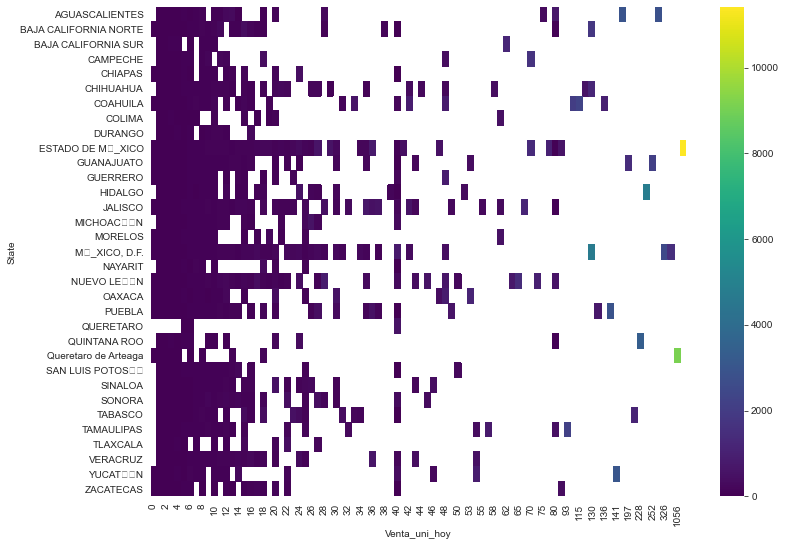

In [16]:
f, ax = plt.subplots(figsize=(12, 9))
bimboHeatMap=bimbo[['Venta_uni_hoy','Venta_hoy','State']]

heatmap1_data = pd.pivot_table(bimboHeatMap, values='Venta_hoy', 
                     index=['State'], 
                     columns='Venta_uni_hoy')
sb.heatmap(heatmap1_data, cmap="viridis")


***

### 6.	Obtenga la matriz de correlación de las variables numéricas e identifique si algunas se pudieran quitar.

In [17]:
bimbo.corr()

,nro,Agencia_ID,Producto_ID,Cliente_ID,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
nro,1.000000,-0.011266,0.010200,-0.007373,NaN,0.000619,-0.015959,0.013162,0.006170,0.006167,0.012014,0.012511
Agencia_ID,-0.011266,1.000000,0.011713,0.015731,NaN,-0.035900,0.005857,-0.001135,-0.005182,-0.000293,0.001211,-0.001211
Producto_ID,0.010200,0.011713,1.000000,0.004610,NaN,0.048599,0.275678,0.031088,0.019605,0.038582,0.026951,0.029788
Cliente_ID,-0.007373,0.015731,0.004610,1.000000,NaN,0.076317,0.063137,-0.009037,-0.008707,-0.009897,-0.011368,-0.008711
Semana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canal_ID,0.000619,-0.035900,0.048599,0.076317,NaN,1.000000,0.411355,0.153173,0.166680,0.030329,0.032511,0.151826
Ruta_SAK,-0.015959,0.005857,0.275678,0.063137,NaN,0.411355,1.000000,0.043658,0.027761,0.010511,-0.005619,0.043769
Venta_uni_hoy,0.013162,-0.001135,0.031088,-0.009037,NaN,0.153173,0.043658,1.000000,0.916012,0.076194,0.071687,0.998758
Venta_hoy,0.006170,-0.005182,0.019605,-0.008707,NaN,0.166680,0.027761,0.916012,1.000000,0.064516,0.070461,0.915181
Dev_uni_proxima,0.006167,-0.000293,0.038582,-0.009897,NaN,0.030329,0.010511,0.076194,0.064516,1.000000,0.894666,0.031926


(12.5, -0.5)

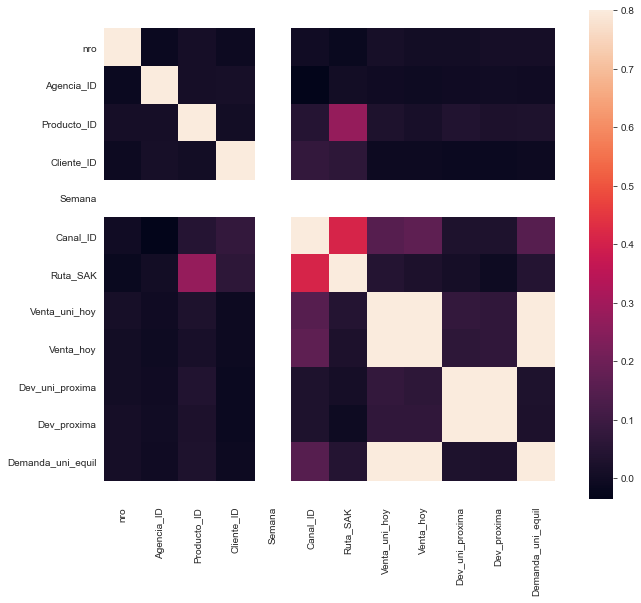

In [18]:
corrmat = bimbo.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

|Conclusión|
|:---|
|Se debería eliminar de nuestro modelo la variable Venta_uni_hoy ya que esta altamente correlacionada con el Venta_hoy.

***

### 7.	Discretice Ruta_SAK, Venta_hoy, Dev_uni_próxima y Dev_próxima

###  Ruta_SAK

In [19]:
bins = [0, 2000, 4000, 6000,8000,10000] 
grupos = ['0 a 2.000', '2.000 a 4.000','4.000 a 6.000','6.000 a 8.000','8.000 a 10.000']
bimbo['RutaSakNueva'] =  pd.cut(bimbo['Ruta_SAK'], bins, labels=grupos)
bimbo.head()

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,codTown,Pueblo,RutaSakNueva
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,1605,2,17.96,0,0.0,2,2001,AG. ATIZAPAN,0 a 2.000
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,2006,6,44.46,0,0.0,6,2260,GONZALEZ GALLO,2.000 a 4.000
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,2024,4,17.76,0,0.0,4,2365,PUEBLA SUR BIMBO,2.000 a 4.000
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,1630,5,62.95,0,0.0,5,2021,AG. XOCHIMILCO 2,0 a 2.000
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,2057,3,13.32,0,0.0,3,2278,ZAPOPAN BIMBO,2.000 a 4.000


###  Venta_hoy

In [20]:
bins = [0, 25, 50, 75,100] 
grupos = ['baja', 'media','alta','muy alta']
bimbo['VentaDiscr'] =  pd.cut(bimbo['Venta_hoy'], bins, labels=grupos)
bimbo.head()

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,codTown,Pueblo,RutaSakNueva,VentaDiscr
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,1605,2,17.96,0,0.0,2,2001,AG. ATIZAPAN,0 a 2.000,baja
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,2006,6,44.46,0,0.0,6,2260,GONZALEZ GALLO,2.000 a 4.000,media
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,2024,4,17.76,0,0.0,4,2365,PUEBLA SUR BIMBO,2.000 a 4.000,baja
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,1630,5,62.95,0,0.0,5,2021,AG. XOCHIMILCO 2,0 a 2.000,alta
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,2057,3,13.32,0,0.0,3,2278,ZAPOPAN BIMBO,2.000 a 4.000,baja


###  Dev_uni_proxima

In [21]:
bins = [0, 25, 50, 75,100] 
grupos = ['baja', 'media','alta','muy alta']
bimbo['UnidadesUniProxima'] =  pd.cut(bimbo['Dev_uni_proxima'], bins, labels=grupos)
bimbo.tail()

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,...,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,codTown,Pueblo,RutaSakNueva,VentaDiscr,UnidadesUniProxima
4995,4973,1384,2321 ZACATECAS MARINELA,ZACATECAS,43065,Rollo Fresa 2p 75g MTA MLA 43065,335485,ABARROTES PINEDO,3,1,...,2,13.52,0,0.00,2,2321,ZACATECAS MARINELA,2.000 a 4.000,baja,NaN
4996,2923,1334,2259 FRESNILLO BIMBO,ZACATECAS,43147,Dalmata 1p 55g MTB MLA 43147,2415094,ABARROTES ACUA,3,1,...,2,9.08,0,0.00,2,2259,FRESNILLO BIMBO,2.000 a 4.000,baja,NaN
4997,2680,1334,2259 FRESNILLO BIMBO,ZACATECAS,1125,Tortillinas 10p 255g TR 1125,4476631,NO IDENTIFICADO,3,1,...,5,48.00,0,0.00,5,2259,FRESNILLO BIMBO,0 a 2.000,media,NaN
4998,417,1384,2321 ZACATECAS MARINELA,ZACATECAS,1687,Roles Glass 6p 410g BIM 1687,373731,DEL SUR,3,1,...,0,0.00,1,18.98,0,2321,ZACATECAS MARINELA,0 a 2.000,NaN,baja
4999,4667,1337,2277 ZACATECAS BIMBO,ZACATECAS,30549,Suavicremas Chocolate 84g MTA MLA 30549,964404,ANTONIO SAUCEDO LECHUGA,3,1,...,2,10.76,0,0.00,2,2277,ZACATECAS BIMBO,2.000 a 4.000,baja,NaN


###  Dev_proxima

In [22]:
bins = [0, 25, 50, 75,100] 
grupos = ['baja', 'media','alta','muy alta']
bimbo['UnidadesProx'] =  pd.cut(bimbo['Dev_proxima'], bins, labels=grupos)
bimbo.head()

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,...,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,codTown,Pueblo,RutaSakNueva,VentaDiscr,UnidadesUniProxima,UnidadesProx
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,...,17.96,0,0.0,2,2001,AG. ATIZAPAN,0 a 2.000,baja,NaN,NaN
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,...,44.46,0,0.0,6,2260,GONZALEZ GALLO,2.000 a 4.000,media,NaN,NaN
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,...,17.76,0,0.0,4,2365,PUEBLA SUR BIMBO,2.000 a 4.000,baja,NaN,NaN
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,...,62.95,0,0.0,5,2021,AG. XOCHIMILCO 2,0 a 2.000,alta,NaN,NaN
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,...,13.32,0,0.0,3,2278,ZAPOPAN BIMBO,2.000 a 4.000,baja,NaN,NaN


### 8.	Obtenga la tabla de relación de frecuencias entre los atributos NombreProducto y State..

In [23]:
pd.crosstab(index=bimbo["NombreProducto"], 
            columns=bimbo["State"], margins=True)

State,AGUASCALIENTES,BAJA CALIFORNIA NORTE,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,COAHUILA,COLIMA,DURANGO,ESTADO DE M_XICO,...,SAN LUIS POTOS,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATN,ZACATECAS,All
NombreProducto,,,,,,,,,,,,,,,,,,,,,
12Granos Multigra TwinPack 1360g MTA ORO 43364,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
?,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Agua Ciel Jamaica 600ml CC 49735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Animalitos Karamelo Hierro 200g LAR 44495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
Animalitos Karamelo Hierro 200g MTA LAR 36598,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wonder 100pct con Ajonjoli 567g MTA WON 35145,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Wonder 100pct con Ajonjoli 567g WON 35144,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,0,0,10
Wonder 100pct grande 567g MTA WON 35148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 9.	Aísle los atributos numéricos e identifique outliers. Quite los outliers que tengan rangos muy lejanos

In [24]:
def rm_IQR_outliers(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    h = 3*iqr # originally 1.5
    df.loc[df[var] > q3+h, var] = q3+h
    df.loc[df[var] < q1-h, var] = q1-h

In [25]:
bimbo.describe()

,nro,Agencia_ID,Producto_ID,Cliente_ID,Semana,Canal_ID,Ruta_SAK,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.0,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,2488.158600,20692.934800,1.766583e+06,3.0,1.33540,2181.184400,7.291600,67.505784,0.140200,1.223214,7.192600
std,1443.520003,3991.970191,18412.703643,1.824051e+06,0.0,1.35428,1620.684035,28.150713,275.268697,1.660209,14.881298,28.052174
min,1.000000,1110.000000,72.000000,2.287000e+03,3.0,1.00000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,1312.000000,1242.000000,3.412298e+05,3.0,1.00000,1182.750000,2.000000,16.760000,0.000000,0.000000,2.000000
50%,2500.500000,1597.000000,30552.000000,1.136562e+06,3.0,1.00000,1410.000000,3.000000,30.000000,0.000000,0.000000,3.000000
75%,3750.250000,2034.000000,37058.000000,2.342404e+06,3.0,1.00000,2805.000000,6.000000,54.760000,0.000000,0.000000,6.000000
max,5000.000000,25759.000000,49986.000000,9.881413e+06,3.0,11.00000,9999.000000,1324.000000,11412.880000,82.000000,759.320000,1324.000000


In [26]:
bimbo[["Venta_hoy","Venta_uni_hoy","Dev_uni_proxima","Dev_proxima"]].describe()

,Venta_hoy,Venta_uni_hoy,Dev_uni_proxima,Dev_proxima
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,67.505784,7.291600,0.140200,1.223214
std,275.268697,28.150713,1.660209,14.881298
min,0.000000,0.000000,0.000000,0.000000
25%,16.760000,2.000000,0.000000,0.000000
50%,30.000000,3.000000,0.000000,0.000000
75%,54.760000,6.000000,0.000000,0.000000
max,11412.880000,1324.000000,82.000000,759.320000


In [27]:
rm_IQR_outliers(bimbo, 'Venta_hoy')

In [28]:
bimbo[["Venta_hoy","Venta_uni_hoy","Dev_uni_proxima","Dev_proxima"]].describe()

,Venta_hoy,Venta_uni_hoy,Dev_uni_proxima,Dev_proxima
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.378114,7.291600,0.140200,1.223214
std,42.851860,28.150713,1.660209,14.881298
min,0.000000,0.000000,0.000000,0.000000
25%,16.760000,2.000000,0.000000,0.000000
50%,30.000000,3.000000,0.000000,0.000000
75%,54.760000,6.000000,0.000000,0.000000
max,168.760000,1324.000000,82.000000,759.320000


|Decisión|
|:---|
|Se ha logrado eliminar los outliers de la Venta_hoy y Venta_uni_hoy|

### 10.	Genere variables dummy utilizando Hot-encoding. Decida en que atributos aplicar este procedimiento, justificándolo.

In [29]:
columna = ["VentaDiscr"]
ventas = pd.get_dummies(bimbo, prefix_sep="_",
                              columns=columna)
ventas.head()

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,...,Demanda_uni_equil,codTown,Pueblo,RutaSakNueva,UnidadesUniProxima,UnidadesProx,VentaDiscr_baja,VentaDiscr_media,VentaDiscr_alta,VentaDiscr_muy alta
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,...,2,2001,AG. ATIZAPAN,0 a 2.000,NaN,NaN,1,0,0,0
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,...,6,2260,GONZALEZ GALLO,2.000 a 4.000,NaN,NaN,0,1,0,0
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,...,4,2365,PUEBLA SUR BIMBO,2.000 a 4.000,NaN,NaN,1,0,0,0
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,...,5,2021,AG. XOCHIMILCO 2,0 a 2.000,NaN,NaN,0,0,1,0
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,...,3,2278,ZAPOPAN BIMBO,2.000 a 4.000,NaN,NaN,1,0,0,0


|Justificación|
|:---|
|Una vez discretizada la Variable Venta_hoy, sería de utilidad analizar los niveles de ventas por rangos.

### 11.	En Ruta_SAK el valor 9999 es null, cambie este valor por el que considere se adecua más a este campo (i.e. media, mediana, algún otro)



In [30]:
bimbo["Ruta_SAK"].replace("9999", np.nan)
#bimbo["Ruta_SAK"].replace({9999: np.nan})
bimbo.head()



,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,...,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,codTown,Pueblo,RutaSakNueva,VentaDiscr,UnidadesUniProxima,UnidadesProx
0,4890,1117,2001 AG. ATIZAPAN,NaN,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,...,17.96,0,0.0,2,2001,AG. ATIZAPAN,0 a 2.000,baja,NaN,NaN
1,1777,1310,2260 GONZALEZ GALLO,NaN,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,...,44.46,0,0.0,6,2260,GONZALEZ GALLO,2.000 a 4.000,media,NaN,NaN
2,1114,1629,2365 PUEBLA SUR BIMBO,NaN,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,...,17.76,0,0.0,4,2365,PUEBLA SUR BIMBO,2.000 a 4.000,baja,NaN,NaN
3,4330,1124,2021 AG. XOCHIMILCO 2,NaN,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,...,62.95,0,0.0,5,2021,AG. XOCHIMILCO 2,0 a 2.000,alta,NaN,NaN
4,1420,1312,2278 ZAPOPAN BIMBO,NaN,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,...,13.32,0,0.0,3,2278,ZAPOPAN BIMBO,2.000 a 4.000,baja,NaN,NaN


In [31]:
bimbo["Ruta_SAK"].sort_values(ascending=False)


3077    9999
3075    9999
3969    9999
1782    9999
3597    9999
        ... 
1373      43
744       22
2882      14
1224      12
1043       8
Name: Ruta_SAK, Length: 5000, dtype: int64

### 12.	El atributo State tiene valores faltantes, cambiar estas marcas con el State que sea más común.


In [32]:
masFrecuente= bimbo['State'].mode()
masFrecuente=str(masFrecuente[0])

bimbo['State']=bimbo['State'].fillna(masFrecuente)
bimbo

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,...,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,codTown,Pueblo,RutaSakNueva,VentaDiscr,UnidadesUniProxima,UnidadesProx
0,4890,1117,2001 AG. ATIZAPAN,ESTADO DE M_XICO,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,...,17.96,0,0.00,2,2001,AG. ATIZAPAN,0 a 2.000,baja,NaN,NaN
1,1777,1310,2260 GONZALEZ GALLO,ESTADO DE M_XICO,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,...,44.46,0,0.00,6,2260,GONZALEZ GALLO,2.000 a 4.000,media,NaN,NaN
2,1114,1629,2365 PUEBLA SUR BIMBO,ESTADO DE M_XICO,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,...,17.76,0,0.00,4,2365,PUEBLA SUR BIMBO,2.000 a 4.000,baja,NaN,NaN
3,4330,1124,2021 AG. XOCHIMILCO 2,ESTADO DE M_XICO,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,...,62.95,0,0.00,5,2021,AG. XOCHIMILCO 2,0 a 2.000,alta,NaN,NaN
4,1420,1312,2278 ZAPOPAN BIMBO,ESTADO DE M_XICO,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,...,13.32,0,0.00,3,2278,ZAPOPAN BIMBO,2.000 a 4.000,baja,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4973,1384,2321 ZACATECAS MARINELA,ZACATECAS,43065,Rollo Fresa 2p 75g MTA MLA 43065,335485,ABARROTES PINEDO,3,1,...,13.52,0,0.00,2,2321,ZACATECAS MARINELA,2.000 a 4.000,baja,NaN,NaN
4996,2923,1334,2259 FRESNILLO BIMBO,ZACATECAS,43147,Dalmata 1p 55g MTB MLA 43147,2415094,ABARROTES ACUA,3,1,...,9.08,0,0.00,2,2259,FRESNILLO BIMBO,2.000 a 4.000,baja,NaN,NaN
4997,2680,1334,2259 FRESNILLO BIMBO,ZACATECAS,1125,Tortillinas 10p 255g TR 1125,4476631,NO IDENTIFICADO,3,1,...,48.00,0,0.00,5,2259,FRESNILLO BIMBO,0 a 2.000,media,NaN,NaN
4998,417,1384,2321 ZACATECAS MARINELA,ZACATECAS,1687,Roles Glass 6p 410g BIM 1687,373731,DEL SUR,3,1,...,0.00,1,18.98,0,2321,ZACATECAS MARINELA,0 a 2.000,NaN,baja,baja


### 13.	Identifique atributos que no serían de utilidad por su nivel de variación. 

In [33]:
bimboAux= bimbo.loc[:,["Venta_hoy","Venta_uni_hoy","Dev_uni_proxima","Dev_proxima"]]
variance_filter = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance_filter.fit(bimboAux)

VarianceThreshold(threshold=0.15999999999999998)

In [34]:
bimboAux.shape

(5000, 4)

In [35]:
bimboAux.var()

Venta_hoy          1836.281934
Venta_uni_hoy       792.462662
Dev_uni_proxima       2.756295
Dev_proxima         221.453043
dtype: float64

In [36]:
len(bimboAux.columns[variance_filter.get_support()])  

4

In [37]:
constant_columns = [column for column in bimboAux.columns
                    if column not in bimboAux.columns[variance_filter.get_support()]]

print(len(constant_columns))  

0


In [38]:
for column in constant_columns:
    print(column)

In [39]:
bimboAux.drop(labels=constant_columns, axis=1, inplace=True)  
bimboAux.shape

(5000, 4)

|Conclusión|
|:---|
|No existe la necesidad de eliminar variables dado el umbral de 0,16%. Las demas variables con poca varianza son útiles para el análisis|

### 14.	Normalice y estandarice los atributos numéricos.

In [40]:
def normalizar (campo,x):
    x_array = np.array(x)
    normalized_X = preprocessing.normalize([x_array])
    normalized_df = pd.DataFrame(normalized_X.flatten(), columns=campo)
    return normalized_df[campo].head()
def standarizar (bd,campo):
    scaler = preprocessing.StandardScaler()
    scaled_df = scaler.fit_transform(bd[campo])
    scaled_df = pd.DataFrame(scaled_df, columns=campo)
    return scaled_df[campo].head()

#### Venta_hoy

In [41]:
normalizar(["Venta_hoy"],bimbo["Venta_hoy"])

,Venta_hoy
0,0.004070
1,0.010075
2,0.004024
3,0.014264
4,0.003018


In [42]:
standarizar(bimbo,["Venta_hoy"])

,Venta_hoy
0,-0.639899
1,-0.021427
2,-0.644567
3,0.410102
4,-0.748190


#### Venta_uni_hoy

In [43]:
normalizar(["Venta_uni_hoy"],bimbo["Venta_uni_hoy"])

,Venta_uni_hoy
0,0.000973
1,0.002918
2,0.001945
3,0.002432
4,0.001459


In [44]:
standarizar(bimbo,["Venta_uni_hoy"])

,Venta_uni_hoy
0,-0.187993
1,-0.045886
2,-0.116939
3,-0.081413
4,-0.152466


#### Dev_uni_proxima

In [45]:
normalizar(["Dev_uni_proxima"],bimbo["Dev_uni_proxima"])

,Dev_uni_proxima
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [46]:
standarizar(bimbo,["Dev_uni_proxima"])

,Dev_uni_proxima
0,-0.084456
1,-0.084456
2,-0.084456
3,-0.084456
4,-0.084456


### 15.	Realice el cálculo con los campos Venta_uni_hoy multiplicado por Venta_hoy, para lo cual cree un campo con el resultado.

In [47]:
bimbo['Resultado']=(bimbo['Venta_uni_hoy']*bimbo['Venta_hoy'])
bimbo.head()

,nro,Agencia_ID,Town,State,Producto_ID,NombreProducto,Cliente_ID,NombreCliente,Semana,Canal_ID,...,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,codTown,Pueblo,RutaSakNueva,VentaDiscr,UnidadesUniProxima,UnidadesProx,Resultado
0,4890,1117,2001 AG. ATIZAPAN,ESTADO DE M_XICO,40217,Mantecada Vainilla 3p 157g Prom TR 40217,59084,MICHOACANA,3,1,...,0,0.0,2,2001,AG. ATIZAPAN,0 a 2.000,baja,NaN,NaN,35.92
1,1777,1310,2260 GONZALEZ GALLO,ESTADO DE M_XICO,43069,Pinguinos 2p 80g MTA MLA 43069,1108542,ELIZABETH OCEGUERA RUIZ,3,1,...,0,0.0,6,2260,GONZALEZ GALLO,2.000 a 4.000,media,NaN,NaN,266.76
2,1114,1629,2365 PUEBLA SUR BIMBO,ESTADO DE M_XICO,35453,Chocotorro Fresa 1p 50g SP MTB MLA 35453,178450,MECHE,3,1,...,0,0.0,4,2365,PUEBLA SUR BIMBO,2.000 a 4.000,baja,NaN,NaN,71.04
3,4330,1124,2021 AG. XOCHIMILCO 2,ESTADO DE M_XICO,4259,Conchas 3p 180g Prom TR 4259,2282890,LA ESTRELLA,3,1,...,0,0.0,5,2021,AG. XOCHIMILCO 2,0 a 2.000,alta,NaN,NaN,314.75
4,1420,1312,2278 ZAPOPAN BIMBO,ESTADO DE M_XICO,32302,Chocotorro Fresa 1p 50g MTB MLA 32302,69156,DELFINA JIMENEZ ZAMORA,3,1,...,0,0.0,3,2278,ZAPOPAN BIMBO,2.000 a 4.000,baja,NaN,NaN,39.96


### 16.	Obtenga por campo State y Product_ID, el total en monto agrupado del resultado del campo de la respuesta a la pregunta 15.

In [48]:
bimbo[['State','Producto_ID','Resultado']].groupby(['State']).agg({'Resultado':'sum'}).reset_index()

,State,Resultado
0,AGUASCALIENTES,128572.58
1,BAJA CALIFORNIA NORTE,71056.49
2,BAJA CALIFORNIA SUR,13603.69
3,CAMPECHE,33238.04
4,CHIAPAS,24395.97
5,CHIHUAHUA,144833.87
6,COAHUILA,126730.81
7,COLIMA,28230.11
8,DURANGO,14065.15
9,ESTADO DE M_XICO,617001.66


### 17.	Obtenga los nombres de clientes y los nombres de productos de State “BAJA CALIFORNIA NORTE” y Canal_ID “4”.

In [51]:
bimboAux=bimbo[(bimbo['State']=='BAJA CALIFORNIA NORTE')&(bimbo['Canal_ID']==4)]
bimboAux[["NombreCliente","NombreProducto"]]

,NombreCliente,NombreProducto
122,OXXO VERSALLES,Medias Noches Conveniencia 290g BIM 8931
130,OXXO PLAYAS,Bran Frut Fresa 48g BIM 48417
146,OXXO JAZMINES,Pan Molido 210g BIM 46772
147,OXXO NUEVA TIJUANA,Canelitas Tubo 33p 180g SP MLA 31511
152,OXXO DEL PRADO,Rebanada 2p 55g SP BIM 32393
159,OXXO ESTANCIA,Nito 1p 62g SP BIM 34053
165,NO IDENTIFICADO,Mantecadas Nuez 123g BIM 41938
167,OXXO INGENIEROS,Pan Blanco 680g BIM 1120
169,OXXO GARCIA,Roles Canela 6p 365g BIM 972
181,OXXO VICENTE GUERRERO,Triki Trakes Tubo 20p 174g SP MLA 31470
